# Desarrollo Guia 3

## Actividad 1. Filtros y cruces

Producto
Escribir en un archivo tipo html de Jupyter  bloques de código y Markdown donde se tomen las variables de una base dada y se les realice lo siguiente:

- Transformación del tipo de dato.
- Cruce de tablas.
- Filtro de variables por algún tipo de criterio.
- Enviar el archivo en formato HTML al tutor en la plataforma.

In [1]:
# Importacion de recurso
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Lectura de los datos Details

In [2]:
# Lectura de los datos en dataset
detail = r'C:\Users\bi\OneDrive - Autocom S.A\Documentos\EAN\guia_3\dataset\Details.csv'
df_detail = pd.read_csv(detail,sep=',',encoding='utf-8')

## Lectura de datos Ordes

In [3]:
# Lectura de datos Ordes
orders = r'C:\Users\bi\OneDrive - Autocom S.A\Documentos\EAN\guia_3\dataset\Orders.csv'
df_orders = pd.read_csv(orders,sep=',',encoding='utf-8')
# Trafomracion de un tipo de dato
df_orders['Order Date'] = pd.to_datetime(df_orders['Order Date'], format='%d-%m-%Y', errors='coerce')


### Exploracion del conjunto de datos Details

In [4]:
# Informacion details
df_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1500 non-null   object
 1   Amount        1500 non-null   int64 
 2   Profit        1500 non-null   int64 
 3   Quantity      1500 non-null   int64 
 4   Category      1500 non-null   object
 5   Sub-Category  1500 non-null   object
 6   PaymentMode   1500 non-null   object
dtypes: int64(3), object(4)
memory usage: 82.2+ KB


In [5]:
# Tamaño del conjunto
df_detail.shape

(1500, 7)

In [6]:
# Validacion de campos id
df_detail['Order ID'].value_counts()

Order ID
B-25656    12
B-26056    12
B-25757    11
B-25999    11
B-25651    10
           ..
B-26044     1
B-26058     1
B-25619     1
B-25815     1
B-26013     1
Name: count, Length: 500, dtype: int64

## Exploracion de datos tabla Orders

In [7]:
# Informacion df_orders
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      500 non-null    object        
 1   Order Date    500 non-null    datetime64[ns]
 2   CustomerName  500 non-null    object        
 3   State         500 non-null    object        
 4   City          500 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 19.7+ KB


In [8]:
# Tamaño de la tabla
df_orders.shape

(500, 5)

In [9]:
# Validacion de campos ID de la tabla ordenes
df_orders['Order ID'].value_counts()

Order ID
B-26095    1
B-26055    1
B-25993    1
B-25973    1
B-25677    1
          ..
B-25798    1
B-26093    1
B-25955    1
B-25967    1
B-25757    1
Name: count, Length: 500, dtype: int64

### Conclusiones
Los datos se en cuentran en forma optima para generar un analisis descripcion y de visualizacion con el fin de ahcer una explarion detallada

In [10]:
# Cruzar dos tablas orden y detail

merged_df = df_detail.join(df_orders.set_index('Order ID'),on='Order ID',how='left')

In [14]:
merged_df.columns

Index(['Order ID', 'Amount', 'Profit', 'Quantity', 'Category', 'Sub-Category',
       'PaymentMode', 'Order Date', 'CustomerName', 'State', 'City', 'Year',
       'Month', 'DayOfWeek'],
      dtype='object')

# Actividad 2. 
## Visualización

Escribir en un archivo tipo html de Jupyter  bloques de código y Markdown donde se tomen las variables de una base dada y se les realice lo siguiente:

- Identificación y alguna transformación del tipo de dato.
- Filtro de variables por algún tipo de criterio.
- Utilizar al menos 2 tipos de gráficos para variables seleccionadas. 

# Analisis grafico de datos

C:\Users\bi\AppData\Local\Temp\ipykernel_20328\3975141837.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=merged_df, palette='Set2')


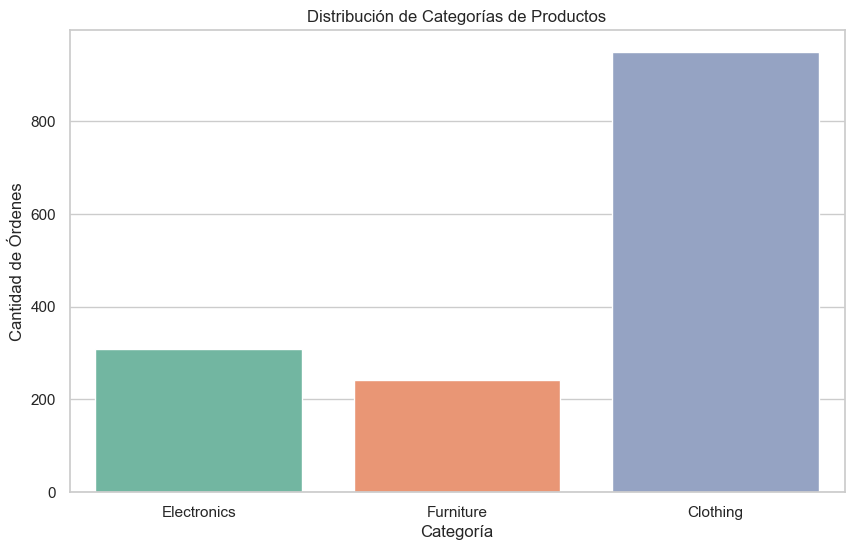

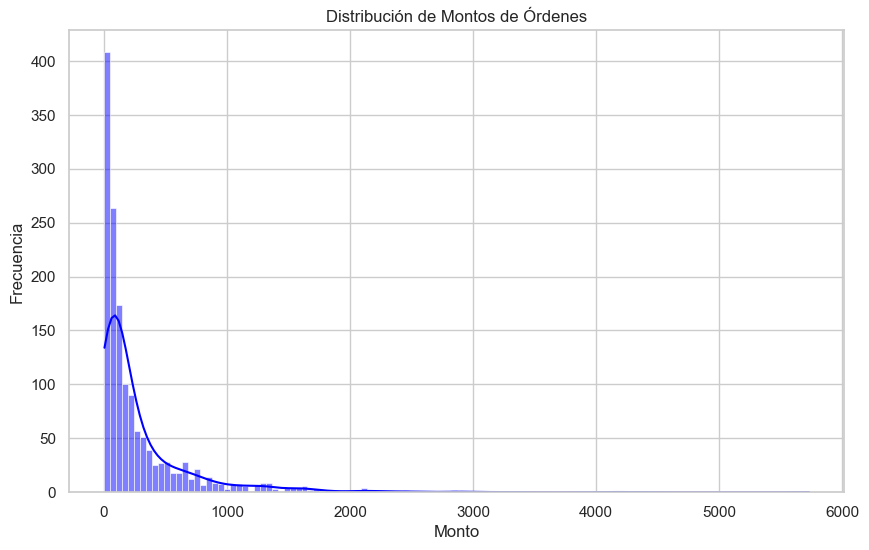

C:\Users\bi\AppData\Local\Temp\ipykernel_20328\3975141837.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Profit', data=merged_df, palette='Set1')


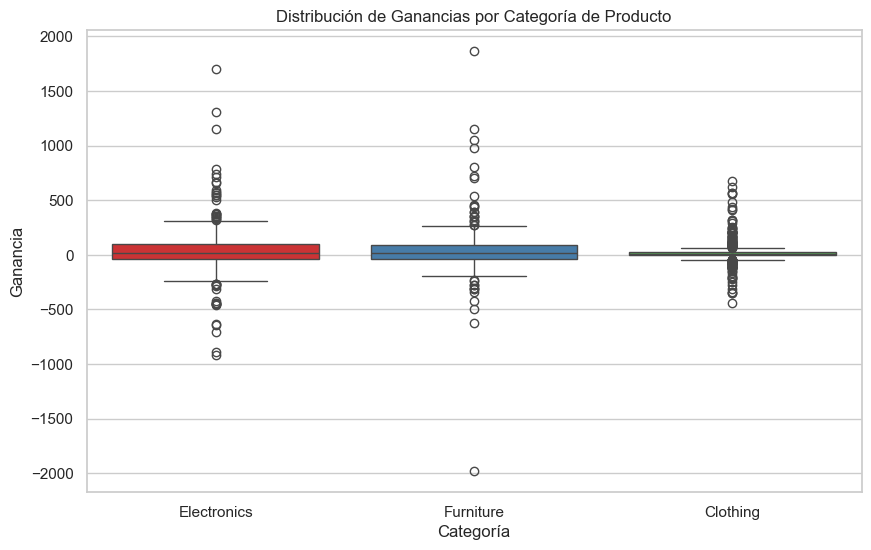

C:\Users\bi\AppData\Local\Temp\ipykernel_20328\3975141837.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y='Sub-Category', x='Amount', data=merged_df, palette='Blues')


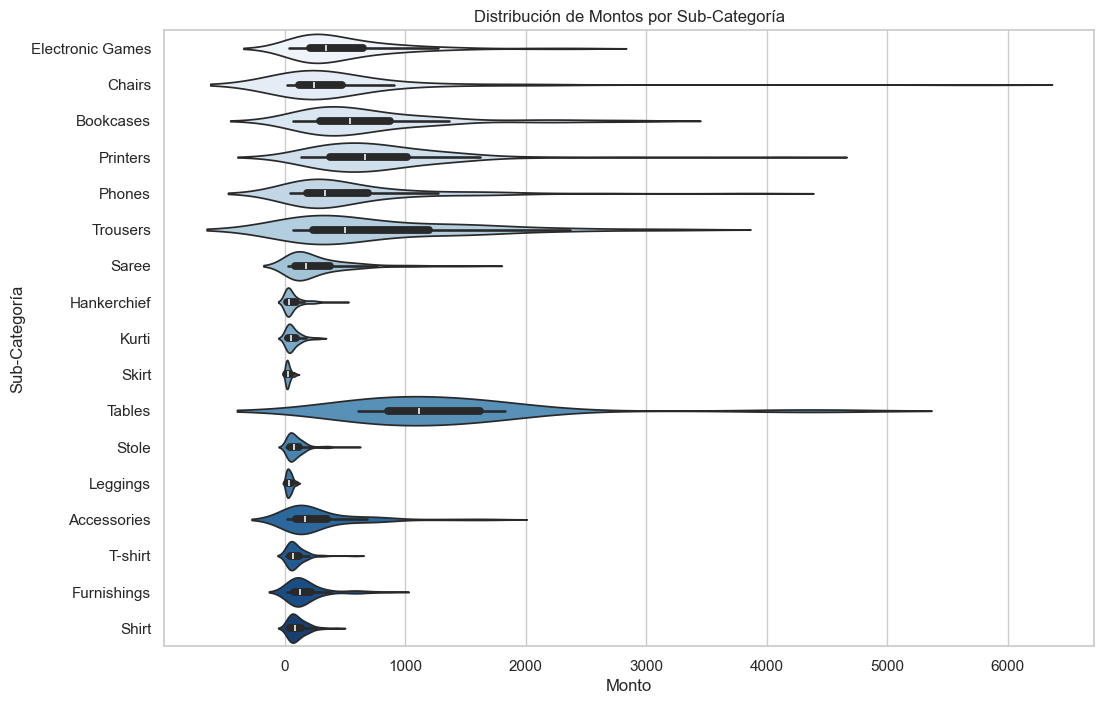

In [23]:
# Configurar estilo de Seaborn
sns.set(style="whitegrid")

# 1. Gráfico de Barras: Distribución de Categorías
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=merged_df, palette='Set2')
plt.title('Distribución de Categorías de Productos')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Órdenes')
plt.show()

# 2. Gráfico de Distribución Normal: Monto de las Órdenes
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Amount'], kde=True, color='blue')
plt.title('Distribución de Montos de Órdenes')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.show()

# 3. Gráfico de Cajas: Distribución de Ganancias por Categoría
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Profit', data=merged_df, palette='Set1')
plt.title('Distribución de Ganancias por Categoría de Producto')
plt.xlabel('Categoría')
plt.ylabel('Ganancia')
plt.show()

# 4 Grafico por subcategoria
plt.figure(figsize=(12, 8))
sns.violinplot(y='Sub-Category', x='Amount', data=merged_df, palette='Blues')
plt.title('Distribución de Montos por Sub-Categoría')
plt.xlabel('Monto')
plt.ylabel('Sub-Categoría')
plt.show()


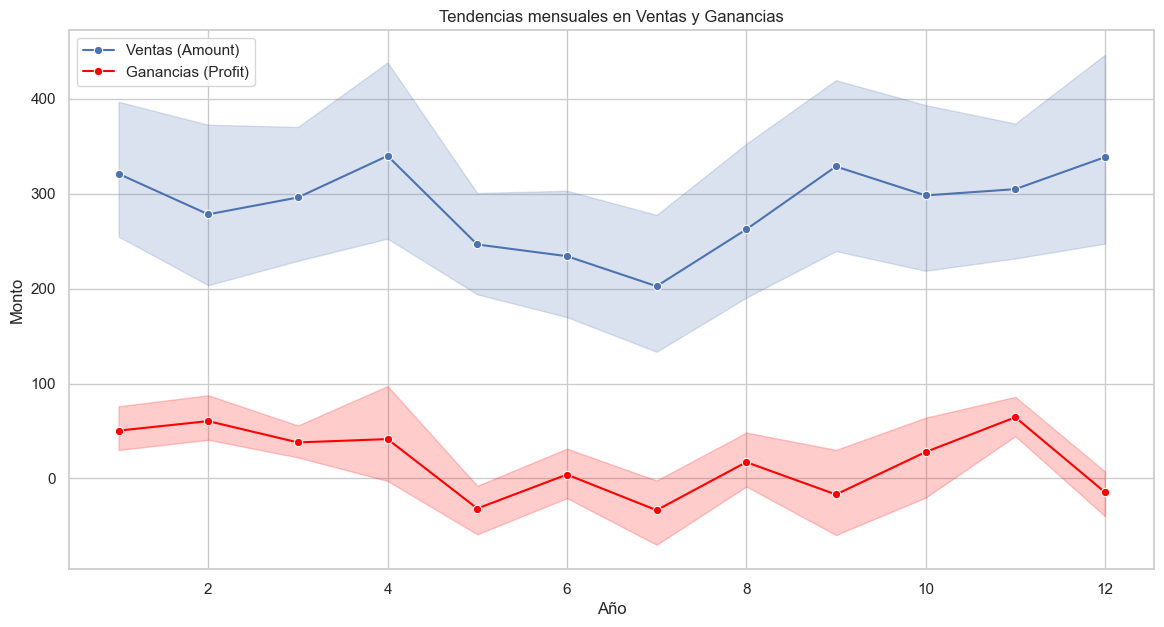

C:\Users\bi\AppData\Local\Temp\ipykernel_20328\1217596414.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='Amount', data=merged_df, palette='Set3')


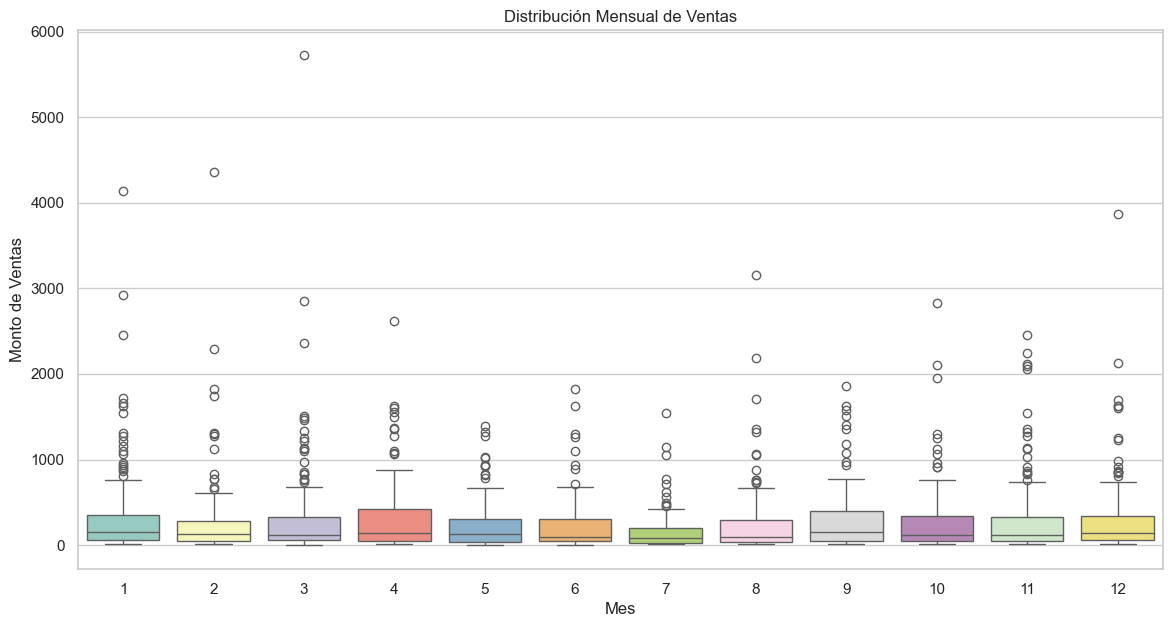

C:\Users\bi\AppData\Local\Temp\ipykernel_20328\1217596414.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DayOfWeek', y='Amount', data=merged_df, palette='Set2')


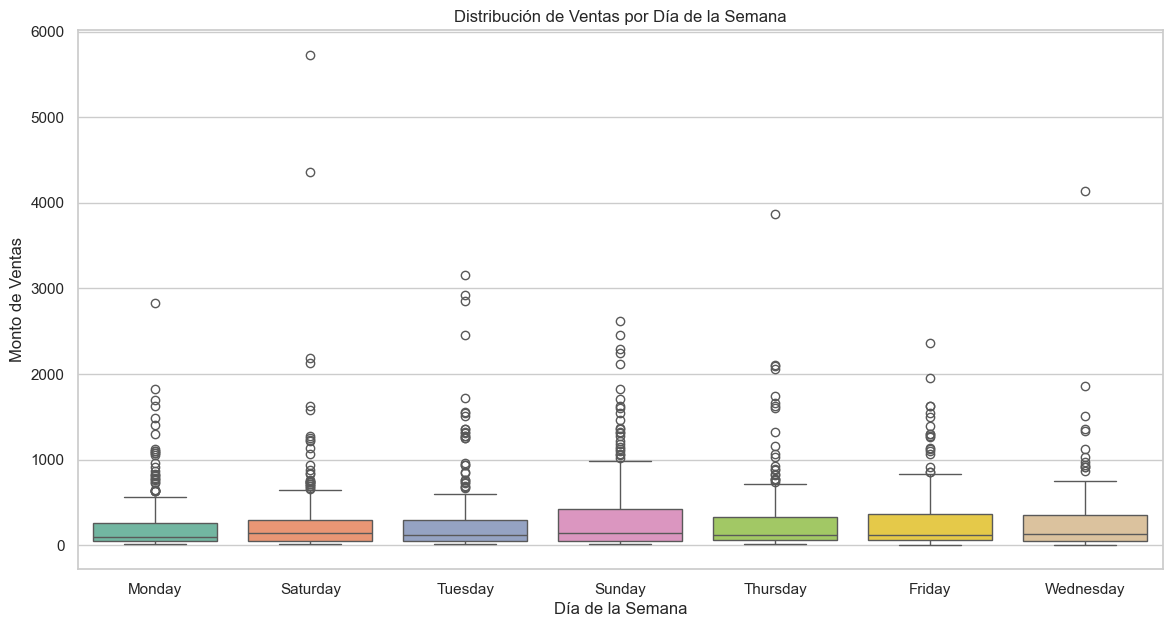

In [13]:
# Extraer información temporal adicional
merged_df['Year'] = merged_df['Order Date'].dt.year
merged_df['Month'] = merged_df['Order Date'].dt.month
merged_df['DayOfWeek'] = merged_df['Order Date'].dt.day_name()

# 1. Tendencias Anuales en Ventas y Ganancias
plt.figure(figsize=(14, 7))
sns.lineplot(x='Month', y='Amount', data=merged_df, marker='o', label='Ventas (Amount)')
sns.lineplot(x='Month', y='Profit', data=merged_df, marker='o', label='Ganancias (Profit)', color='red')
plt.title('Tendencias mensuales en Ventas y Ganancias')
plt.xlabel('Año')
plt.ylabel('Monto')
plt.legend()
plt.show()

# 2. Estacionalidad Mensual en Ventas
plt.figure(figsize=(14, 7))
sns.boxplot(x='Month', y='Amount', data=merged_df, palette='Set3')
plt.title('Distribución Mensual de Ventas')
plt.xlabel('Mes')
plt.ylabel('Monto de Ventas')
plt.show()

# 3. Ventas por Día de la Semana
plt.figure(figsize=(14, 7))
sns.boxplot(x='DayOfWeek', y='Amount', data=merged_df, palette='Set2')
plt.title('Distribución de Ventas por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Monto de Ventas')
plt.show()


# Mapa de calor por sub-categoria

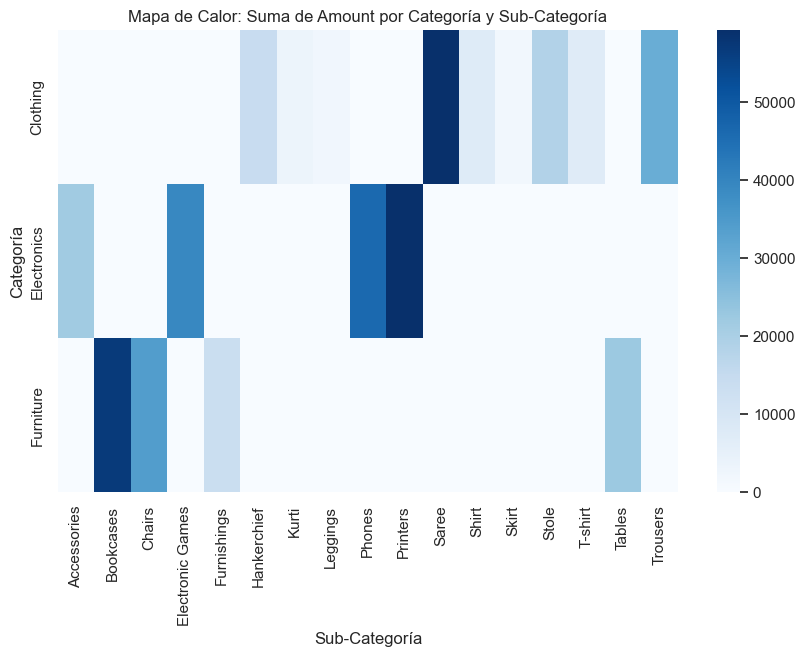

In [22]:
df_detail_sub_ca = merged_df.groupby(by=['Category', 'Sub-Category']).agg({'Amount': 'sum', 'Profit': 'sum', 'Quantity': 'sum'})

# Crear la tabla pivot para el mapa de calor
pivot_table = df_detail_sub_ca.pivot_table(values='Amount', index='Category', columns='Sub-Category', fill_value=0)

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Generar el heatmap con Seaborn
sns.heatmap(pivot_table, annot=False, fmt=".1f", cmap='Blues')

# Agregar títulos y etiquetas
plt.title('Mapa de Calor: Suma de Amount por Categoría y Sub-Categoría')
plt.xlabel('Sub-Categoría')
plt.ylabel('Categoría')
plt.grid()

# Conlusiones de guia 3

#### 1. Distribución de las Categorías de Productos:
- La distribución de las categorías de productos en las ventas indica que algunos tipos de productos dominan el mercado. Por ejemplo, si observamos una preponderancia de ventas en la categoría de "Electronics" en comparación con "Furniture", podríamos concluir que los productos electrónicos son más populares o tienen una mayor demanda.
#### Conclusión:
- La empresa debería enfocar sus esfuerzos de marketing y suministro en la categoría que muestra mayores ventas, al mismo tiempo que podría explorar oportunidades para mejorar las ventas en las categorías menos populares.

#### 2. Distribución Normal de las Ventas y Ganancias:
- Al analizar la distribución de Amount y Profit, podríamos observar si siguen una distribución normal. Si la distribución de las ventas no es normal y está sesgada hacia un lado, esto podría indicar una concentración de ventas en ciertos rangos de precios.
#### Conclusión: 
- Si las ventas y ganancias están sesgadas a la derecha, esto sugiere que hay un pequeño número de ventas de gran valor. La empresa podría beneficiarse al analizar estos productos de alto valor para maximizar las oportunidades de ventas.

#### 3. Estacionalidad Mensual en Ventas:
El análisis de la estacionalidad mensual muestra cómo varían las ventas a lo largo del año. Si ciertos meses muestran consistentemente mayores ventas, podríamos identificar patrones estacionales.
#### Conclusión: 
Si hay un aumento de ventas en meses específicos (como diciembre debido a la temporada navideña), la empresa podría ajustar sus estrategias de inventario y marketing para capitalizar estas tendencias estacionales.